# Notes

## total cars in a county

## total population in a county
## total land area in a county

## vehicles per household

## per cent of commute method per county used

## commute time per means of transportation

## for each graph, have an amalgamated total population and total hours spent on commuting

## the data is processed grouped by population density and then averaged per normalized weighing by total population



# HYPTHESIS

vehicle density relates with commute times
- more vehicles, longer commute by car

combination of x variables where this may be the case

logit analysis - public transit is faster than driving

# Data Prep

In [46]:

# Init
# choropleth
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# # NOTE - THIS TAKES AROUND 13 MINUTES

# # OLD # skips the 2nd row that contains indexing names
# # Now looking at the row that is consistent between 2009 and 2019 data, using the indexing csv file for guidance.
df_2009 = pd.read_csv('./acs_transportation_data/2009-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2019 = pd.read_csv('./acs_transportation_data/2019-5yr-transport.csv', na_values=".", skiprows=[0])

# df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0])
df_2014 = pd.read_csv('./acs_transportation_data/acs 2014 mmsa transport.csv', na_values=".", skiprows=[0])
# df_2009 = pd.read_csv('./2009-5yr-transport.csv', na_values=".", skiprows=[0])
# df_2014 = pd.read_csv('./acs_transportation_data/2014-5yr-transport.csv', na_values=".", skiprows=[0], sep='\t')
# df_2019 = pd.read_csv('./2019-5yr-transport.csv', na_values=".", skiprows=[0])


In [48]:
df_2014.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,PCT_ACS14_5yr_B08122019,PCT_ACS14_5yr_B08122020,PCT_ACS14_5yr_B08122021,PCT_ACS14_5yr_B08122022,PCT_ACS14_5yr_B08122023,PCT_ACS14_5yr_B08122024,PCT_ACS14_5yr_B08122025,PCT_ACS14_5yr_B08122026,PCT_ACS14_5yr_B08122027,PCT_ACS14_5yr_B08122028
0,10100,"Aberdeen, SD Micro Area","Aberdeen, SD Micro Area",us,310,0,ACSSF,5333,NaN,NaN,...,0.05,2.57,2.03,0.31,0.47,1.25,3.48,0.31,0.19,2.98
1,10140,"Aberdeen, WA Micro Area","Aberdeen, WA Micro Area",us,310,0,ACSSF,5334,NaN,NaN,...,0.16,1.85,1.63,0.18,0.22,1.23,4.92,0.27,0.42,4.22
2,10180,"Abilene, TX Metro Area","Abilene, TX Metro Area",us,310,0,ACSSF,5335,NaN,NaN,...,0.22,1.12,1.94,0.31,0.40,1.24,2.29,0.12,0.17,1.99
3,10220,"Ada, OK Micro Area","Ada, OK Micro Area",us,310,0,ACSSF,5336,NaN,NaN,...,0.28,1.09,1.46,0.14,0.38,0.94,1.84,0.14,0.04,1.67
4,10260,"Adjuntas, PR Micro Area","Adjuntas, PR Micro Area",pr,310,0,ACSSF,6632,NaN,NaN,...,0.67,3.45,0.00,0.00,0.00,0.00,1.24,0.81,0.00,0.43


In [49]:
# ACS14_5yr_B01001001 = Total Population

df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']
df_2014['population_density'] = df_2014['ACS14_5yr_B01001001'] / df_2014['Geo_AREALAND']


In [50]:
# ACS14_5yr_B01001001 - total_population
df_2014['total_population'] = df_2014['ACS14_5yr_B01001001']

# Workers 16 Years and Over in Households,ACS14_5yr_B08014001
df_2014['total_workers'] = df_2014['ACS14_5yr_B08014001']

df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS14_5yr_B08015001
df_2014['aggregate_num_vehicles'] = df_2014['ACS14_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS14_5yr_B08136001
df_2014['aggregate_time_commute'] = df_2014['ACS14_5yr_B08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",ACS14_5yr_C08136002
df_2014['aggregate_time_commute_drive_alone'] = df_2014['ACS14_5yr_B08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",ACS14_5yr_C08136003
df_2014['aggregate_time_commute_carpool'] = df_2014['ACS14_5yr_B08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),ACS14_5yr_C08136004
df_2014['aggregate_time_commute_public_transit'] = df_2014['ACS14_5yr_B08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",ACS14_5yr_C08136005
df_2014['aggregate_time_commute_other_means'] = df_2014['ACS14_5yr_B08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS14_5yr_C08134011
df_2014['total_workers_drove_alone'] = df_2014['ACS14_5yr_B08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS14_5yr_C08134021
df_2014['total_workers_carpooled'] = df_2014['ACS14_5yr_B08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS14_5yr_C08134031
df_2014['total_workers_public_transit'] = df_2014['ACS14_5yr_B08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS14_5yr_C08134041
df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']

# Total.181,ACS14_5yr_B08134001
df_2014['ttl_wrkr_cmute'] = df_2014['ACS14_5yr_B08134001']


# Car Truck Or Van - Drove Alone.13,ACS14_5yr_B08122005
df_2014['wrkrs_drove_alone'] = df_2014['ACS14_5yr_B08122005']
# Car Truck Or Van - Drove Alone: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122006
df_2014['wrkrs_drove_alone_below_100_poverty'] = df_2014['ACS14_5yr_B08122006']
df_2014['pct_wrkrs_drove_alone_below_100_poverty'] = df_2014['ACS14_5yr_B08122006'] / df_2014['ttl_wrkr_cmute']
# Car Truck Or Van - Drove Alone: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122007
df_2014['wrkrs_drove_alone_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122007']
# Car Truck Or Van - Drove Alone: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122008
df_2014['wrkrs_drove_alone_over_150_poverty'] = df_2014['ACS14_5yr_B08122008']

# Car Truck Or Van - Carpooled.13,ACS14_5yr_B08122009
df_2014['wrkrs_carpool'] = df_2014['ACS14_5yr_B08122009']
# Car Truck Or Van - Carpooled: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122010
df_2014['wrkrs_carpool_below_100_poverty'] = df_2014['ACS14_5yr_B08122010']
df_2014['pct_wrkrs_carpool_below_100_poverty'] = df_2014['ACS14_5yr_B08122010'] / df_2014['ttl_wrkr_cmute']
# Car Truck Or Van - Carpooled: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122011
df_2014['wrkrs_carpool_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122011']
# Car Truck Or Van - Carpooled: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122012
df_2014['wrkrs_carpool_over_150_poverty'] = df_2014['ACS14_5yr_B08122012']

# Public Transportation (Excluding Taxicab).14,ACS14_5yr_B08122013
df_2014['wrkrs_public_transit'] = df_2014['ACS14_5yr_B08122013']
# Public Transportation (Excluding Taxicab): Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122014
df_2014['wrkrs_public_transit_below_100_poverty'] = df_2014['ACS14_5yr_B08122014']
df_2014['pct_wrkrs_public_transit_below_100_poverty'] = df_2014['ACS14_5yr_B08122014'] / df_2014['ttl_wrkr_cmute']
# Public Transportation (Excluding Taxicab): 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122015
df_2014['wrkrs_public_transit_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122015']
# Public Transportation (Excluding Taxicab): At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122016
df_2014['wrkrs_public_transit_over_150_poverty'] = df_2014['ACS14_5yr_B08122016']

# Walked.14,ACS14_5yr_B08122017
df_2014['wrkrs_walked'] = df_2014['ACS14_5yr_B08122017']
# Walked: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122018
df_2014['wrkrs_walked_below_100_poverty'] = df_2014['ACS14_5yr_B08122018']
df_2014['pct_wrkrs_walked_below_100_poverty'] = df_2014['ACS14_5yr_B08122018'] / df_2014['ttl_wrkr_cmute']
# Walked: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122019
df_2014['wrkrs_walked_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122019']
# Walked: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122020
df_2014['wrkrs_walked_over_150_poverty'] = df_2014['ACS14_5yr_B08122020']

# Taxicab Motorcycle Bicycle Or Other Means.13,ACS14_5yr_B08122021
df_2014['wrkrs_commute_other_means'] = df_2014['ACS14_5yr_B08122021']
# Taxicab Motorcycle Bicycle Or Other Means: Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122022
df_2014['wrkrs_commute_other_means_below_100_poverty'] = df_2014['ACS14_5yr_B08122022']
df_2014['pct_wrkrs_commute_other_means_below_100_poverty'] = df_2014['ACS14_5yr_B08122022'] / df_2014['ttl_wrkr_cmute']
# Taxicab Motorcycle Bicycle Or Other Means: 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122023
df_2014['wrkrs_commute_other_means_100_to_150_poverty'] = df_2014['ACS14_5yr_B08122023']
# Taxicab Motorcycle Bicycle Or Other Means: At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122024
df_2014['wrkrs_commute_other_means_over_150_poverty'] = df_2014['ACS14_5yr_B08122024']

# # Worked From Home.14,ACS14_5yr_B08122025
# df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home Below 100 Percent Of The Poverty Level,ACS14_5yr_B08122026
# df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home 100 To 149 Percent Of The Poverty Level,ACS14_5yr_B08122027
# df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']
# # Worked From Home At Or Above 150 Percent Of The Poverty Level,ACS14_5yr_B08122028
# df_2014['total_workers_other_means'] = df_2014['ACS14_5yr_B08134041']

# Less Than 10 Minutes,ACS14_5yr_B08134002
df_2014['ttl_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134002']
# 10 To 14 Minutes.1,ACS14_5yr_B08134003
df_2014['ttl_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134003']
# 15 To 19 Minutes.1,ACS14_5yr_B08134004
df_2014['ttl_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134004']
# 20 To 24 Minutes.1,ACS14_5yr_B08134005
df_2014['ttl_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134005']
# 25 To 29 Minutes.1,ACS14_5yr_B08134006
df_2014['ttl_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134006']
# 30 To 34 Minutes.1,ACS14_5yr_B08134007
df_2014['ttl_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134007']
# 35 To 44 Minutes,ACS14_5yr_B08134008
df_2014['ttl_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134008']
# 45 To 59 Minutes.1,ACS14_5yr_B08134009
df_2014['ttl_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134009']
# 60 Or More Minutes,ACS14_5yr_B08134010
df_2014['ttl_wrkr_cmute_over_60'] = df_2014['ACS14_5yr_B08134010']
# 15 min range Percents
df_2014['pct_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_wrkr_cmute_under_10_min'] + df_2014['ttl_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_wrkr_cmute_15_to_19_min'] + df_2014['ttl_wrkr_cmute_20_to_24_min'] + df_2014['ttl_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_wrkr_cmute_30_to_34_min'] + df_2014['ttl_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_wrkr_cmute_44_to_59_min'] = df_2014['ttl_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_wrkr_cmute_over_60_min'] = df_2014['ttl_wrkr_cmute_over_60'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_wrkr_cmute_under_10_min'] + df_2014['ttl_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_wrkr_cmute_15_to_19_min'] + df_2014['ttl_wrkr_cmute_20_to_24_min'] + df_2014['ttl_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_wrkr_cmute_30_to_34_min'] + df_2014['ttl_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_wrkr_cmute_44_to_59_min'] = df_2014['ttl_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
# df_2014['pct_wrkr_cmute_over_60_min'] = df_2014['ttl_wrkr_cmute_over_60'] / df_2014['ttl_wrkr_cmute']

# Car Truck Or Van.1,ACS14_5yr_B08134011
df_2014['ttl_car_wrkr_cmute'] = df_2014['ACS14_5yr_B08134011']
# Car Truck Or Van: Less Than 10 Minutes,ACS14_5yr_B08134012
df_2014['ttl_car_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134012']
# Car Truck Or Van: 10 To 14 Minutes,ACS14_5yr_B08134013
df_2014['ttl_car_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134013']
# Car Truck Or Van: 15 To 19 Minutes,ACS14_5yr_B08134014
df_2014['ttl_car_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134014']
# Car Truck Or Van: 20 To 24 Minutes,ACS14_5yr_B08134015
df_2014['ttl_car_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134015']
# Car Truck Or Van: 25 To 29 Minutes,ACS14_5yr_B08134016
df_2014['ttl_car_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134016']
# Car Truck Or Van: 30 To 34 Minutes,ACS14_5yr_B08134017
df_2014['ttl_car_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134017']
# Car Truck Or Van: 35 To 44 Minutes,ACS14_5yr_B08134018
df_2014['ttl_car_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134018']
# Car Truck Or Van: 45 To 59 Minutes,ACS14_5yr_B08134019
df_2014['ttl_car_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134019']
# Car Truck Or Van: 60 Or More Minutes,ACS14_5yr_B08134020
df_2014['ttl_car_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134020']
# # Car Truck Or Van: Drove Alone.1,ACS14_5yr_B08134021
# df_2014['ttl_car_wrkr_cmute'] = df_2014['ACS14_5yr_B08134021']
# # Car Truck Or Van: Drove Alone: Less Than 10 Minutes,ACS14_5yr_B08134022
# df_2014['ttl_car_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134022']
# # Car Truck Or Van: Drove Alone: 10 To 14 Minutes,ACS14_5yr_B08134023
# df_2014['ttl_car_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134023']
# # Car Truck Or Van: Drove Alone: 15 To 19 Minutes,ACS14_5yr_B08134024
# df_2014['ttl_car_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134024']
# # Car Truck Or Van: Drove Alone: 20 To 24 Minutes,ACS14_5yr_B08134025
# df_2014['ttl_car_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134025']
# # Car Truck Or Van: Drove Alone: 25 To 29 Minutes,ACS14_5yr_B08134026
# df_2014['ttl_car_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134026']
# # Car Truck Or Van: Drove Alone: 30 To 34 Minutes,ACS14_5yr_B08134027
# df_2014['ttl_car_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134027']
# # Car Truck Or Van: Drove Alone: 35 To 44 Minutes,ACS14_5yr_B08134028
# df_2014['ttl_car_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134028']
# # Car Truck Or Van: Drove Alone: 45 To 59 Minutes,ACS14_5yr_B08134029
# df_2014['ttl_car_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134029']
# # Car Truck Or Van: Drove Alone: 60 Or More Minutes,ACS14_5yr_B08134030
# df_2014['ttl_car_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134030']
# 15 min range Percents
df_2014['pct_car_wrkr_cmute'] = df_2014['ttl_car_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_car_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_car_wrkr_cmute_under_10_min'] + df_2014['ttl_car_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_car_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_car_wrkr_cmute_15_to_19_min'] + df_2014['ttl_car_wrkr_cmute_20_to_24_min'] + df_2014['ttl_car_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_car_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_car_wrkr_cmute_30_to_34_min'] + df_2014['ttl_car_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_car_wrkr_cmute_44_to_59_min'] = df_2014['ttl_car_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_car_wrkr_cmute_over_60_min'] = df_2014['ttl_car_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_car_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_car_wrkr_cmute_under_10_min'] + df_2014['ttl_car_wrkr_cmute_10_to_14_min']) / df_2014['ttl_car_wrkr_cmute']
# df_2014['pct_car_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_car_wrkr_cmute_15_to_19_min'] + df_2014['ttl_car_wrkr_cmute_20_to_24_min'] + df_2014['ttl_car_wrkr_cmute_25_to_29_min']) / df_2014['ttl_car_wrkr_cmute']
# df_2014['pct_car_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_car_wrkr_cmute_30_to_34_min'] + df_2014['ttl_car_wrkr_cmute_35_to_44_min']) / df_2014['ttl_car_wrkr_cmute']
# df_2014['pct_car_wrkr_cmute_44_to_59_min'] = df_2014['ttl_car_wrkr_cmute_45_to_59_min'] / df_2014['ttl_car_wrkr_cmute']
# df_2014['pct_car_wrkr_cmute_over_60_min'] = df_2014['ttl_car_wrkr_cmute_over_60_min'] / df_2014['ttl_car_wrkr_cmute']

df_2014['zero_check'] = 1
# Zero Check
df_2014['zero_check'] = df_2014['pct_car_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_car_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_car_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_car_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_car_wrkr_cmute_over_60_min'] * df_2014['zero_check']

##### SOLO ABD CARPOOL DRIVIGN IS COMBINED INTO OVERALL CAR

# #  Carpooled,ACS14_5yr_B08134031
# df_2014['ttl_carpool_wrkr_cmute'] = df_2014['ACS14_5yr_B08134031']
# #  Carpooled: Less Than 10 Minutes,ACS14_5yr_B08134032
# df_2014['ttl_carpool_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134032']
# #  Carpooled: 10 To 14 Minutes,ACS14_5yr_B08134033
# df_2014['ttl_carpool_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134033']
# #  Carpooled: 15 To 19 Minutes,ACS14_5yr_B08134034
# df_2014['ttl_carpool_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134034']
# #  Carpooled: 20 To 24 Minutes,ACS14_5yr_B08134035
# df_2014['ttl_carpool_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134035']
# #  Carpooled: 25 To 29 Minutes,ACS14_5yr_B08134036
# df_2014['ttl_carpool_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134036']
# #  Carpooled: 30 To 34 Minutes,ACS14_5yr_B08134037
# df_2014['ttl_carpool_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134037']
# #  Carpooled: 35 To 44 Minutes,ACS14_5yr_B08134038
# df_2014['ttl_carpool_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134038']
# #  Carpooled: 45 To 59 Minutes,ACS14_5yr_B08134039
# df_2014['ttl_carpool_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134039']
# #  Carpooled: 60 Or More Minutes,ACS14_5yr_B08134040
# df_2014['ttl_carpool_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134040']
# # 15 min range Percents
# df_2014['pct_carpool_wrkr_cmute'] = df_2014['ttl_carpool_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
# df_2014['pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_carpool_wrkr_cmute_under_10_min'] + df_2014['ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2014['ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2014['ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2014['ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
# df_2014['pct_carpool_wrkr_cmute_44_to_59_min'] = df_2014['ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
# df_2014['pct_carpool_wrkr_cmute_over_60_min'] = df_2014['ttl_carpool_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # # 15 min range Percents
# # df_2014['pct_carpool_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_carpool_wrkr_cmute_under_10_min'] + df_2014['ttl_carpool_wrkr_cmute_10_to_14_min']) / df_2014['ttl_carpool_wrkr_cmute']
# # df_2014['pct_carpool_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_carpool_wrkr_cmute_15_to_19_min'] + df_2014['ttl_carpool_wrkr_cmute_20_to_24_min'] + df_2014['ttl_carpool_wrkr_cmute_25_to_29_min']) / df_2014['ttl_carpool_wrkr_cmute']
# # df_2014['pct_carpool_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_carpool_wrkr_cmute_30_to_34_min'] + df_2014['ttl_carpool_wrkr_cmute_35_to_44_min']) / df_2014['ttl_carpool_wrkr_cmute']
# # df_2014['pct_carpool_wrkr_cmute_44_to_59_min'] = df_2014['ttl_carpool_wrkr_cmute_45_to_59_min'] / df_2014['ttl_carpool_wrkr_cmute']
# # df_2014['pct_carpool_wrkr_cmute_over_60_min'] = df_2014['ttl_carpool_wrkr_cmute_over_60_min'] / df_2014['ttl_carpool_wrkr_cmute']


# Public Transportation (Excluding Taxicab).20,ACS14_5yr_B08134061
df_2014['ttl_all_public_tspt_wrkr_cmute'] = df_2014['ACS14_5yr_B08134061']
# Public Transportation (Excluding Taxicab): Less Than 10 Minutes,ACS14_5yr_B08134062
df_2014['ttl_all_public_tspt_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134062']
# Public Transportation (Excluding Taxicab): 10 To 14 Minutes,ACS14_5yr_B08134063
df_2014['ttl_all_public_tspt_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134063']
# Public Transportation (Excluding Taxicab): 15 To 19 Minutes,ACS14_5yr_B08134064
df_2014['ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134064']
# Public Transportation (Excluding Taxicab): 20 To 24 Minutes,ACS14_5yr_B08134065
df_2014['ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134065']
# Public Transportation (Excluding Taxicab): 25 To 29 Minutes,ACS14_5yr_B08134066
df_2014['ttl_all_public_tspt_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134066']
# Public Transportation (Excluding Taxicab): 30 To 34 Minutes,ACS14_5yr_B08134067
df_2014['ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134067']
# Public Transportation (Excluding Taxicab): 35 To 44 Minutes,ACS14_5yr_B08134068
df_2014['ttl_all_public_tspt_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134068']
# Public Transportation (Excluding Taxicab): 45 To 59 Minutes,ACS14_5yr_B08134069
df_2014['ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134069']
# Public Transportation (Excluding Taxicab): 60 Or More Minutes,ACS14_5yr_B08134070
df_2014['ttl_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134070']
# 15 min range Percents
df_2014['pct_all_public_tspt_wrkr_cmute'] = df_2014['ttl_all_public_tspt_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2014['ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_all_public_tspt_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_under_10_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_10_to_14_min']) / df_2014['ttl_all_public_tspt_wrkr_cmute']
# df_2014['pct_all_public_tspt_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_15_to_19_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_20_to_24_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_25_to_29_min']) / df_2014['ttl_all_public_tspt_wrkr_cmute']
# df_2014['pct_all_public_tspt_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_all_public_tspt_wrkr_cmute_30_to_34_min'] + df_2014['ttl_all_public_tspt_wrkr_cmute_35_to_44_min']) / df_2014['ttl_all_public_tspt_wrkr_cmute']
# df_2014['pct_all_public_tspt_wrkr_cmute_44_to_59_min'] = df_2014['ttl_all_public_tspt_wrkr_cmute_45_to_59_min'] / df_2014['ttl_all_public_tspt_wrkr_cmute']
# df_2014['pct_all_public_tspt_wrkr_cmute_over_60_min'] = df_2014['ttl_all_public_tspt_wrkr_cmute_over_60_min'] / df_2014['ttl_all_public_tspt_wrkr_cmute']
# Zero Check
df_2014['zero_check'] = df_2014['pct_all_public_tspt_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_all_public_tspt_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_all_public_tspt_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_all_public_tspt_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_all_public_tspt_wrkr_cmute_over_60_min'] * df_2014['zero_check']


# Public Transportation (Excluding Taxicab): Bus.1,ACS14_5yr_B08134071
df_2014['ttl_bus_wrkr_cmute'] = df_2014['ACS14_5yr_B08134071']
# Public Transportation (Excluding Taxicab): Bus: Less Than 10 Minutes,ACS14_5yr_B08134072
df_2014['ttl_bus_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134072']
# Public Transportation (Excluding Taxicab): Bus: 10 To 14 Minutes,ACS14_5yr_B08134073
df_2014['ttl_bus_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134073']
# Public Transportation (Excluding Taxicab): Bus: 15 To 19 Minutes,ACS14_5yr_B08134074
df_2014['ttl_bus_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134074']
# Public Transportation (Excluding Taxicab): Bus: 20 To 24 Minutes,ACS14_5yr_B08134075
df_2014['ttl_bus_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134075']
# Public Transportation (Excluding Taxicab): Bus: 25 To 29 Minutes,ACS14_5yr_B08134076
df_2014['ttl_bus_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134076']
# Public Transportation (Excluding Taxicab): Bus: 30 To 34 Minutes,ACS14_5yr_B08134077
df_2014['ttl_bus_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134077']
# Public Transportation (Excluding Taxicab): Bus: 35 To 44 Minutes,ACS14_5yr_B08134078
df_2014['ttl_bus_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134078']
# Public Transportation (Excluding Taxicab): Bus: 45 To 59 Minutes,ACS14_5yr_B08134079
df_2014['ttl_bus_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134079']
# Public Transportation (Excluding Taxicab): Bus: 60 Or More Minutes,ACS14_5yr_B08134080
df_2014['ttl_bus_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134080']
# 15 min range Percents
df_2014['pct_bus_wrkr_cmute'] = df_2014['ttl_bus_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_bus_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_bus_wrkr_cmute_under_10_min'] + df_2014['ttl_bus_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_bus_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_bus_wrkr_cmute_15_to_19_min'] + df_2014['ttl_bus_wrkr_cmute_20_to_24_min'] + df_2014['ttl_bus_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_bus_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_bus_wrkr_cmute_30_to_34_min'] + df_2014['ttl_bus_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_bus_wrkr_cmute_44_to_59_min'] = df_2014['ttl_bus_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_bus_wrkr_cmute_over_60_min'] = df_2014['ttl_bus_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_bus_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_bus_wrkr_cmute_under_10_min'] + df_2014['ttl_bus_wrkr_cmute_10_to_14_min']) / df_2014['ttl_bus_wrkr_cmute']
# df_2014['pct_bus_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_bus_wrkr_cmute_15_to_19_min'] + df_2014['ttl_bus_wrkr_cmute_20_to_24_min'] + df_2014['ttl_bus_wrkr_cmute_25_to_29_min']) / df_2014['ttl_bus_wrkr_cmute']
# df_2014['pct_bus_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_bus_wrkr_cmute_30_to_34_min'] + df_2014['ttl_bus_wrkr_cmute_35_to_44_min']) / df_2014['ttl_bus_wrkr_cmute']
# df_2014['pct_bus_wrkr_cmute_44_to_59_min'] = df_2014['ttl_bus_wrkr_cmute_45_to_59_min'] / df_2014['ttl_bus_wrkr_cmute']
# df_2014['pct_bus_wrkr_cmute_over_60_min'] = df_2014['ttl_bus_wrkr_cmute_over_60_min'] / df_2014['ttl_bus_wrkr_cmute']
# Zero Check
df_2014['zero_check'] = df_2014['pct_bus_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_bus_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_bus_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_bus_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_bus_wrkr_cmute_over_60_min'] * df_2014['zero_check']


#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico),ACS14_5yr_B08134081
df_2014['ttl_local_rails_wrkr_cmute'] = df_2014['ACS14_5yr_B08134081']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): Less Than 10 Minutes,ACS14_5yr_B08134082
df_2014['ttl_local_rails_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134082']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 10 To 14 Minutes,ACS14_5yr_B08134083
df_2014['ttl_local_rails_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134083']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 15 To 19 Minutes,ACS14_5yr_B08134084
df_2014['ttl_local_rails_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134084']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 20 To 24 Minutes,ACS14_5yr_B08134085
df_2014['ttl_local_rails_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134085']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 25 To 29 Minutes,ACS14_5yr_B08134086
df_2014['ttl_local_rails_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134086']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 30 To 34 Minutes,ACS14_5yr_B08134087
df_2014['ttl_local_rails_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134087']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 35 To 44 Minutes,ACS14_5yr_B08134088
df_2014['ttl_local_rails_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134088']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 45 To 59 Minutes,ACS14_5yr_B08134089
df_2014['ttl_local_rails_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134089']
#  Subway Or Elevated Rail Light Rail Streetcar Or Trolley (Carro P̼blico In Puerto Rico): 60 Or More Minutes,ACS14_5yr_B08134090
df_2014['ttl_local_rails_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134090']
# 15 min range Percents
df_2014['pct_local_rails_wrkr_cmute'] = df_2014['ttl_local_rails_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_local_rails_wrkr_cmute_under_10_min'] + df_2014['ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2014['ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2014['ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2014['ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2014['ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_local_rails_wrkr_cmute_over_60_min'] = df_2014['ttl_local_rails_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_local_rails_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_local_rails_wrkr_cmute_under_10_min'] + df_2014['ttl_local_rails_wrkr_cmute_10_to_14_min']) / df_2014['ttl_local_rails_wrkr_cmute']
# df_2014['pct_local_rails_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_local_rails_wrkr_cmute_15_to_19_min'] + df_2014['ttl_local_rails_wrkr_cmute_20_to_24_min'] + df_2014['ttl_local_rails_wrkr_cmute_25_to_29_min']) / df_2014['ttl_local_rails_wrkr_cmute']
# df_2014['pct_local_rails_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_local_rails_wrkr_cmute_30_to_34_min'] + df_2014['ttl_local_rails_wrkr_cmute_35_to_44_min']) / df_2014['ttl_local_rails_wrkr_cmute']
# df_2014['pct_local_rails_wrkr_cmute_44_to_59_min'] = df_2014['ttl_local_rails_wrkr_cmute_45_to_59_min'] / df_2014['ttl_local_rails_wrkr_cmute']
# df_2014['pct_local_rails_wrkr_cmute_over_60_min'] = df_2014['ttl_local_rails_wrkr_cmute_over_60_min'] / df_2014['ttl_local_rails_wrkr_cmute']
# Zero Check
df_2014['zero_check'] = df_2014['pct_local_rails_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_local_rails_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_local_rails_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_local_rails_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_local_rails_wrkr_cmute_over_60_min'] * df_2014['zero_check']


#  Long-Distance Train Or Commuter Rail Or Ferryboat,ACS14_5yr_B08134091
df_2014['ttl_long_distance_public_transport_wrkr_cmute'] = df_2014['ACS14_5yr_B08134091']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: Less Than 10 Minutes,ACS14_5yr_B08134092
df_2014['ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134092']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 10 To 14 Minutes,ACS14_5yr_B08134093
df_2014['ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134093']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 15 To 19 Minutes,ACS14_5yr_B08134094
df_2014['ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134094']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 20 To 24 Minutes,ACS14_5yr_B08134095
df_2014['ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134095']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 25 To 29 Minutes,ACS14_5yr_B08134096
df_2014['ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134096']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 30 To 34 Minutes,ACS14_5yr_B08134097
df_2014['ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134097']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 35 To 44 Minutes,ACS14_5yr_B08134098
df_2014['ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134098']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 45 To 59 Minutes,ACS14_5yr_B08134099
df_2014['ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134099']
#  Long-Distance Train Or Commuter Rail Or Ferryboat: 60 Or More Minutes,ACS14_5yr_B08134100
df_2014['ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134100']
# 15 min range Percents
df_2014['pct_long_distance_public_transport_wrkr_cmute'] = df_2014['ttl_long_distance_public_transport_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2014['ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_under_10_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_10_to_14_min']) / df_2014['ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_15_to_19_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_20_to_24_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_25_to_29_min']) / df_2014['ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_long_distance_public_transport_wrkr_cmute_30_to_34_min'] + df_2014['ttl_long_distance_public_transport_wrkr_cmute_35_to_44_min']) / df_2014['ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] = df_2014['ttl_long_distance_public_transport_wrkr_cmute_45_to_59_min'] / df_2014['ttl_long_distance_public_transport_wrkr_cmute']
# df_2014['pct_long_distance_public_transport_wrkr_cmute_over_60_min'] = df_2014['ttl_long_distance_public_transport_wrkr_cmute_over_60_min'] / df_2014['ttl_long_distance_public_transport_wrkr_cmute']
# Zero Check
df_2014['zero_check'] = df_2014['pct_long_distance_public_transport_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_long_distance_public_transport_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_long_distance_public_transport_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_long_distance_public_transport_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_long_distance_public_transport_wrkr_cmute_over_60_min'] * df_2014['zero_check']


# Walked.20,ACS14_5yr_B08134101
df_2014['ttl_walked_wrkr_cmute'] = df_2014['ACS14_5yr_B08134101']
# Walked: Less Than 10 Minutes,ACS14_5yr_B08134102
df_2014['ttl_walked_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134102']
# Walked: 10 To 14 Minutes,ACS14_5yr_B08134103
df_2014['ttl_walked_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134103']
# Walked: 15 To 19 Minutes,ACS14_5yr_B08134104
df_2014['ttl_walked_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134104']
# Walked: 20 To 24 Minutes,ACS14_5yr_B08134105
df_2014['ttl_walked_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134105']
# Walked: 25 To 29 Minutes,ACS14_5yr_B08134106
df_2014['ttl_walked_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134106']
# Walked: 30 To 34 Minutes,ACS14_5yr_B08134107
df_2014['ttl_walked_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134107']
# Walked: 35 To 44 Minutes,ACS14_5yr_B08134108
df_2014['ttl_walked_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134108']
# Walked: 45 To 59 Minutes,ACS14_5yr_B08134109
df_2014['ttl_walked_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134109']
# Walked: 60 Or More Minutes,ACS14_5yr_B08134110
df_2014['ttl_walked_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134110']
# 15 min range Percents
df_2014['pct_walked_wrkr_cmute'] = df_2014['ttl_walked_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_walked_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_walked_wrkr_cmute_under_10_min'] + df_2014['ttl_walked_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_walked_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_walked_wrkr_cmute_15_to_19_min'] + df_2014['ttl_walked_wrkr_cmute_20_to_24_min'] + df_2014['ttl_walked_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_walked_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_walked_wrkr_cmute_30_to_34_min'] + df_2014['ttl_walked_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_walked_wrkr_cmute_44_to_59_min'] = df_2014['ttl_walked_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_walked_wrkr_cmute_over_60_min'] = df_2014['ttl_walked_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_walked_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_walked_wrkr_cmute_under_10_min'] + df_2014['ttl_walked_wrkr_cmute_10_to_14_min']) / df_2014['ttl_walked_wrkr_cmute']
# df_2014['pct_walked_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_walked_wrkr_cmute_15_to_19_min'] + df_2014['ttl_walked_wrkr_cmute_20_to_24_min'] + df_2014['ttl_walked_wrkr_cmute_25_to_29_min']) / df_2014['ttl_walked_wrkr_cmute']
# df_2014['pct_walked_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_walked_wrkr_cmute_30_to_34_min'] + df_2014['ttl_walked_wrkr_cmute_35_to_44_min']) / df_2014['ttl_walked_wrkr_cmute']
# df_2014['pct_walked_wrkr_cmute_44_to_59_min'] = df_2014['ttl_walked_wrkr_cmute_45_to_59_min'] / df_2014['ttl_walked_wrkr_cmute']
# df_2014['pct_walked_wrkr_cmute_over_60_min'] = df_2014['ttl_walked_wrkr_cmute_over_60_min'] / df_2014['ttl_walked_wrkr_cmute']
# Zero Check
df_2014['zero_check'] = df_2014['pct_walked_wrkr_cmute_01_to_14_min'] * \
                        df_2014['pct_walked_wrkr_cmute_15_to_29_min'] * \
                        df_2014['pct_walked_wrkr_cmute_30_to_44_min'] * \
                        df_2014['pct_walked_wrkr_cmute_44_to_59_min'] * \
                        df_2014['pct_walked_wrkr_cmute_over_60_min'] * df_2014['zero_check']

# Taxicab Motorcycle Bicycle Or Other Means.19,ACS14_5yr_B08134111
df_2014['ttl_misc_trspt_method_wrkr_cmute'] = df_2014['ACS14_5yr_B08134111']
# Taxicab Motorcycle Bicycle Or Other Means: Less Than 10 Minutes,ACS14_5yr_B08134112
df_2014['ttl_misc_trspt_method_wrkr_cmute_under_10_min'] = df_2014['ACS14_5yr_B08134112']
# Taxicab Motorcycle Bicycle Or Other Means: 10 To 14 Minutes,ACS14_5yr_B08134113
df_2014['ttl_misc_trspt_method_wrkr_cmute_10_to_14_min'] = df_2014['ACS14_5yr_B08134113']
# Taxicab Motorcycle Bicycle Or Other Means: 15 To 19 Minutes,ACS14_5yr_B08134114
df_2014['ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] = df_2014['ACS14_5yr_B08134114']
# Taxicab Motorcycle Bicycle Or Other Means: 20 To 24 Minutes,ACS14_5yr_B08134115
df_2014['ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] = df_2014['ACS14_5yr_B08134115']
# Taxicab Motorcycle Bicycle Or Other Means: 25 To 29 Minutes,ACS14_5yr_B08134116
df_2014['ttl_misc_trspt_method_wrkr_cmute_25_to_29_min'] = df_2014['ACS14_5yr_B08134116']
# Taxicab Motorcycle Bicycle Or Other Means: 30 To 34 Minutes,ACS14_5yr_B08134117
df_2014['ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] = df_2014['ACS14_5yr_B08134117']
# Taxicab Motorcycle Bicycle Or Other Means: 35 To 44 Minutes,ACS14_5yr_B08134118
df_2014['ttl_misc_trspt_method_wrkr_cmute_35_to_44_min'] = df_2014['ACS14_5yr_B08134118']
# Taxicab Motorcycle Bicycle Or Other Means: 45 To 59 Minutes,ACS14_5yr_B08134119
df_2014['ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] = df_2014['ACS14_5yr_B08134119']
# Taxicab Motorcycle Bicycle Or Other Means: 60 Or More Minutes,ACS14_5yr_B08134120
df_2014['ttl_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134120']
# 15 min range Percents
df_2014['pct_misc_trspt_method_wrkr_cmute'] = df_2014['ttl_misc_trspt_method_wrkr_cmute'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2014['ttl_wrkr_cmute']
df_2014['pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2014['ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2014['ttl_wrkr_cmute']
df_2014['pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['ttl_misc_trspt_method_wrkr_cmute_over_60_min'] / df_2014['ttl_wrkr_cmute']
# # 15 min range Percents
# df_2014['pct_misc_trspt_method_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_under_10_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_10_to_14_min']) / df_2014['ttl_misc_trspt_method_wrkr_cmute']
# df_2014['pct_misc_trspt_method_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_15_to_19_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_20_to_24_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_25_to_29_min']) / df_2014['ttl_misc_trspt_method_wrkr_cmute']
# df_2014['pct_misc_trspt_method_wrkr_cmute_30_to_44_min'] = (df_2014['ttl_misc_trspt_method_wrkr_cmute_30_to_34_min'] + df_2014['ttl_misc_trspt_method_wrkr_cmute_35_to_44_min']) / df_2014['ttl_misc_trspt_method_wrkr_cmute']
# df_2014['pct_misc_trspt_method_wrkr_cmute_44_to_59_min'] = df_2014['ttl_misc_trspt_method_wrkr_cmute_45_to_59_min'] / df_2014['ttl_misc_trspt_method_wrkr_cmute']
# df_2014['pct_misc_trspt_method_wrkr_cmute_over_60_min'] = df_2014['ACS14_5yr_B08134120'] / df_2014['ttl_misc_trspt_method_wrkr_cmute']


# df_2014 = df_2014[df_2014['zero_check'] !=0]
# df_2014 = df_2014.loc[(df_2014[['zero_check']] != 0).all(axis=1)]
# df_2014 = df_2014.dropna(subset=['zero_check', 'aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])



df_2014['population_density'] = df_2014['total_population'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['worker_density'] = df_2014['total_workers'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['vehicles_density'] = df_2014['aggregate_num_vehicles'] / df_2014['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2014['vehicles_per_worker'] = df_2014['aggregate_num_vehicles'] / df_2014['total_workers']# / 1000000 # convert to sqkm
df_2014['vehicles_per_worker_x_landarea'] = (df_2014['aggregate_num_vehicles'] / df_2014['total_workers']) * df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2014['vehicles_per_worker_per_landarea'] = (df_2014['aggregate_num_vehicles'] / df_2014['total_workers']) / df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2014['vehicles_x_worker_per_landarea'] = (df_2014['aggregate_num_vehicles'] * df_2014['total_workers']) / df_2014['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2014['vehicle_density_x_vehicles_per_worker'] = (df_2014['vehicles_density'] * df_2014['vehicles_per_worker'])

df_2014['average_commute_time_per_worker_drive_alone'] = df_2014['aggregate_time_commute_drive_alone'] / df_2014['total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2014['aggregate_time_commute_drive_alone']) / sum(df_2014['total_workers_drove_alone'])

df_2014['average_commute_time_per_worker_carpool'] = df_2014['aggregate_time_commute_carpool'] / df_2014['total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2014['aggregate_time_commute_carpool']) / sum(df_2014['total_workers_carpooled'])

df_2014['average_commute_time_per_worker_public_transit'] = df_2014['aggregate_time_commute_public_transit'] / df_2014['total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2014['aggregate_time_commute_public_transit']) / sum(df_2014['total_workers_public_transit'])

df_2014['average_commute_time_per_worker_other_means'] = df_2014['aggregate_time_commute_other_means'] / df_2014['total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2014['aggregate_time_commute_other_means']) / sum(df_2014['total_workers_other_means'])

df = df_2014[[
    'Geo_NAME', 'Geo_FIPS', 'total_population',

    'vehicles_density', 'population_density', 'vehicles_per_worker', 'vehicle_density_x_vehicles_per_worker',
    
    'average_commute_time_per_worker_drive_alone', 'average_commute_time_per_worker_carpool',
    'average_commute_time_per_worker_public_transit', 'average_commute_time_per_worker_other_means',
    
    'ttl_wrkr_cmute',

    'pct_wrkrs_drove_alone_below_100_poverty', 'pct_wrkrs_carpool_below_100_poverty',
    'pct_wrkrs_public_transit_below_100_poverty',
    'pct_wrkrs_walked_below_100_poverty',
    'pct_wrkrs_commute_other_means_below_100_poverty',

    'pct_wrkr_cmute_01_to_14_min', 'pct_wrkr_cmute_15_to_29_min',
    'pct_wrkr_cmute_30_to_44_min', 'pct_wrkr_cmute_44_to_59_min', 'pct_wrkr_cmute_over_60_min',

    'ttl_car_wrkr_cmute',
    'pct_car_wrkr_cmute', 'pct_car_wrkr_cmute_01_to_14_min', 'pct_car_wrkr_cmute_15_to_29_min',
    'pct_car_wrkr_cmute_30_to_44_min', 'pct_car_wrkr_cmute_44_to_59_min', 'pct_car_wrkr_cmute_over_60_min',
    # 'ttl_carpool_wrkr_cmute',
    # 'pct_carpool_wrkr_cmute', 'pct_carpool_wrkr_cmute_01_to_14_min', 'pct_carpool_wrkr_cmute_15_to_29_min',
    # 'pct_carpool_wrkr_cmute_30_to_44_min', 'pct_carpool_wrkr_cmute_44_to_59_min', 'pct_carpool_wrkr_cmute_over_60_min',

    'ttl_all_public_tspt_wrkr_cmute',
    'pct_all_public_tspt_wrkr_cmute', 'pct_all_public_tspt_wrkr_cmute_01_to_14_min', 'pct_all_public_tspt_wrkr_cmute_15_to_29_min',
    'pct_all_public_tspt_wrkr_cmute_30_to_44_min', 'pct_all_public_tspt_wrkr_cmute_44_to_59_min', 'pct_all_public_tspt_wrkr_cmute_over_60_min',

    'ttl_bus_wrkr_cmute',
    'pct_bus_wrkr_cmute', 'pct_bus_wrkr_cmute_01_to_14_min', 'pct_bus_wrkr_cmute_15_to_29_min',
    'pct_bus_wrkr_cmute_30_to_44_min', 'pct_bus_wrkr_cmute_44_to_59_min', 'pct_bus_wrkr_cmute_over_60_min',

    'ttl_local_rails_wrkr_cmute',
    'pct_local_rails_wrkr_cmute', 'pct_local_rails_wrkr_cmute_01_to_14_min', 'pct_local_rails_wrkr_cmute_15_to_29_min',
    'pct_local_rails_wrkr_cmute_30_to_44_min', 'pct_local_rails_wrkr_cmute_44_to_59_min', 'pct_local_rails_wrkr_cmute_over_60_min',

    'ttl_long_distance_public_transport_wrkr_cmute',
    'pct_long_distance_public_transport_wrkr_cmute', 'pct_long_distance_public_transport_wrkr_cmute_01_to_14_min', 'pct_long_distance_public_transport_wrkr_cmute_15_to_29_min',
    'pct_long_distance_public_transport_wrkr_cmute_30_to_44_min', 'pct_long_distance_public_transport_wrkr_cmute_44_to_59_min', 'pct_long_distance_public_transport_wrkr_cmute_over_60_min',

    'ttl_walked_wrkr_cmute',
    'pct_walked_wrkr_cmute', 'pct_walked_wrkr_cmute_01_to_14_min', 'pct_walked_wrkr_cmute_15_to_29_min',
    'pct_walked_wrkr_cmute_30_to_44_min', 'pct_walked_wrkr_cmute_44_to_59_min', 'pct_walked_wrkr_cmute_over_60_min',

    'ttl_misc_trspt_method_wrkr_cmute',
    'pct_misc_trspt_method_wrkr_cmute', 'pct_misc_trspt_method_wrkr_cmute_01_to_14_min', 'pct_misc_trspt_method_wrkr_cmute_15_to_29_min',
    'pct_misc_trspt_method_wrkr_cmute_30_to_44_min', 'pct_misc_trspt_method_wrkr_cmute_44_to_59_min', 'pct_misc_trspt_method_wrkr_cmute_over_60_min']]

# df_2014[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
#         'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]
# # df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS']]


C:\Users\cjong\AppData\Local\Temp\ipykernel_18024\265704237.py:296: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2014['pct_bus_wrkr_cmute_01_to_14_min'] = (df_2014['ttl_bus_wrkr_cmute_under_10_min'] + df_2014['ttl_bus_wrkr_cmute_10_to_14_min']) / df_2014['ttl_wrkr_cmute']
C:\Users\cjong\AppData\Local\Temp\ipykernel_18024\265704237.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_2014['pct_bus_wrkr_cmute_15_to_29_min'] = (df_2014['ttl_bus_wrkr_cmute_15_to_19_min'] + df_2014['ttl_bus_wrkr_cmute_20_to_24_min'] + df_2014

In [51]:

# # average commute time based on population density
# df.to_excel('df_2014_filtered_columns3.xlsx', index=False)

# population of over 100k
df = df.query("total_population > 100000") # [['Geo_AREALAND','Geo_FIPS']]

x = df['vehicles_per_worker']
y = df['pct_car_wrkr_cmute_01_to_14_min']
# y = df['pct_car_wrkr_cmute']

    # 'pct_car_wrkr_cmute', 'pct_car_wrkr_cmute_01_to_14_min', 'pct_car_wrkr_cmute_15_to_29_min',
    # 'pct_car_wrkr_cmute_30_to_44_min', 'pct_car_wrkr_cmute_44_to_59_min', 'pct_car_wrkr_cmute_over_60_min',


In [52]:
# make log versions of appropriate data

In [53]:
# # # practice a normal scatter plot
# plt.scatter(x, y)
# plt.show()

# x = np.log(df['vehicles_per_worker'])
# y = np.log(df['pct_car_wrkr_cmute_over_60_min'])

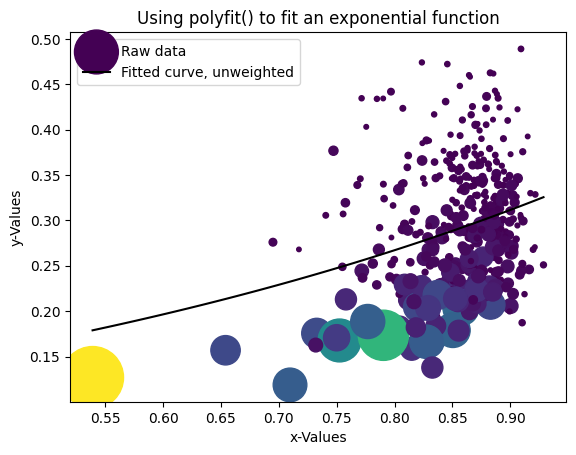

In [58]:
x = df['vehicles_per_worker']
y = df['pct_car_wrkr_cmute_01_to_14_min']
# y = df['pct_car_wrkr_cmute_15_to_29_min']
# y = df['pct_car_wrkr_cmute_30_to_44_min']
# y = np.log(df['pct_car_wrkr_cmute_30_to_44_min'])
# y = df['pct_car_wrkr_cmute_44_to_59_min']
# y = df['pct_car_wrkr_cmute_over_60_min']

# y = df['pct_car_wrkr_cmute_01_to_14_min']
# y = df['pct_car_wrkr_cmute_15_to_29_min']
# y = df['pct_car_wrkr_cmute_30_to_44_min']
# y = np.log(df['pct_car_wrkr_cmute_30_to_44_min'])
# y = df['pct_car_wrkr_cmute_44_to_59_min']
# y = df['pct_car_wrkr_cmute_over_60_min'] # * (df['pct_car_wrkr_cmute'] * df['ttl_car_wrkr_cmute'])

# fit poly line to original chart

# Fit a weighted polynomial of degree 1 (a linear function) to the data # x, y
p = np.polyfit(x, np.log(y), 1)
# p = np.polyfit(x, y, 1)
a = np.exp(p[1])
b = p[0]
c = df['total_population']
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.exp(b * x_fitted)

# Fit a weighted polynomial of degree 1 (a linear function) to the data
p = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
# p = np.polyfit(x, y, 1, w=np.sqrt(y))

# # Convert the polynomial back into an exponential
# a = np.exp(p[1])
# b = p[0]
# x_fitted_weighted = np.linspace(np.min(x), np.max(x), 100)
# y_fitted_weighted = a * np.exp(b * x_fitted_weighted)

# Plot
ax = plt.axes()
ax.scatter(x, y, c=c,s = c/10000, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve, unweighted')
# ax.plot(x_fitted_weighted, y_fitted_weighted, 'k--', label='Fitted curve, weighted')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

In [ ]:
print(asdf)

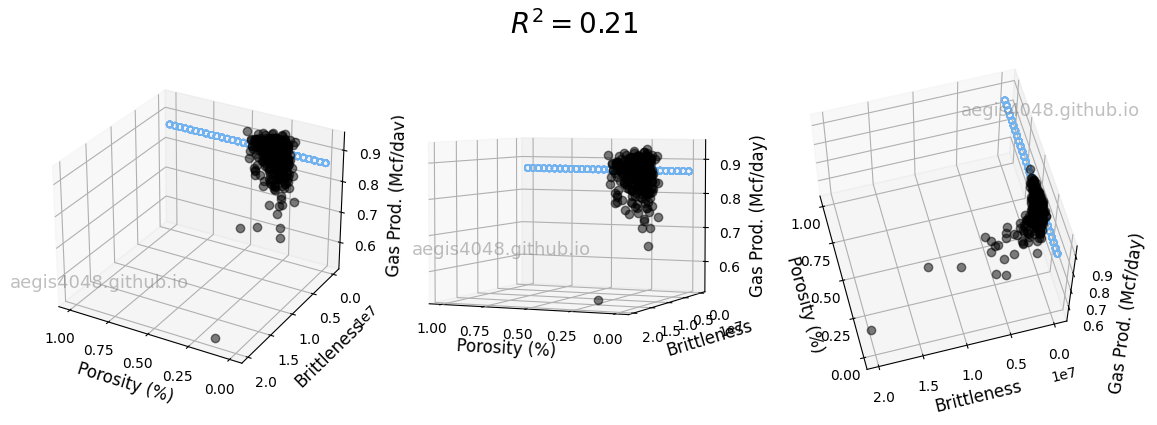

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

# file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
# df = pd.read_csv(file)

X = df[['pct_car_wrkr_cmute_01_to_14_min', 'total_population']].values.reshape(-1,2)
Y = df['vehicles_per_worker']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 1, 30)   # range of porosity values
y_pred = np.linspace(0, 1, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
print(asdf)

NameError: name 'asdf' is not defined

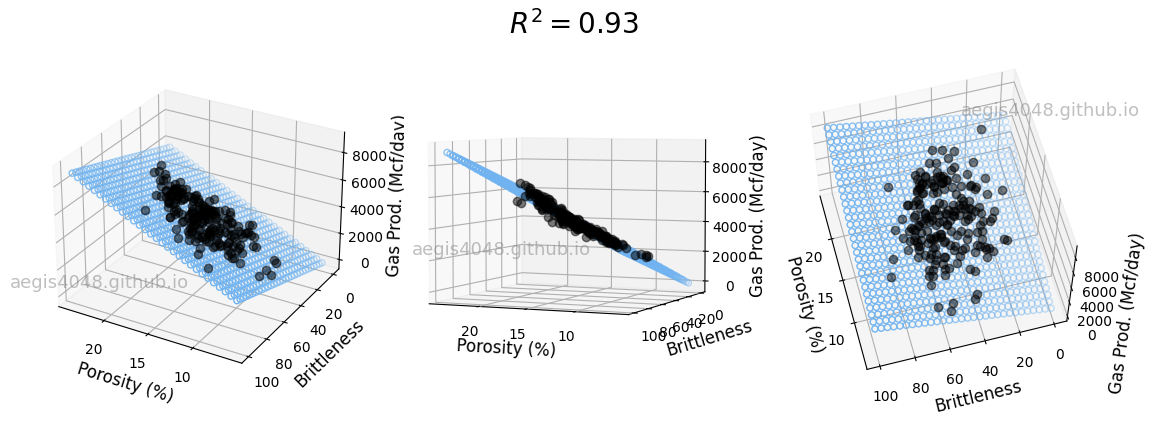

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

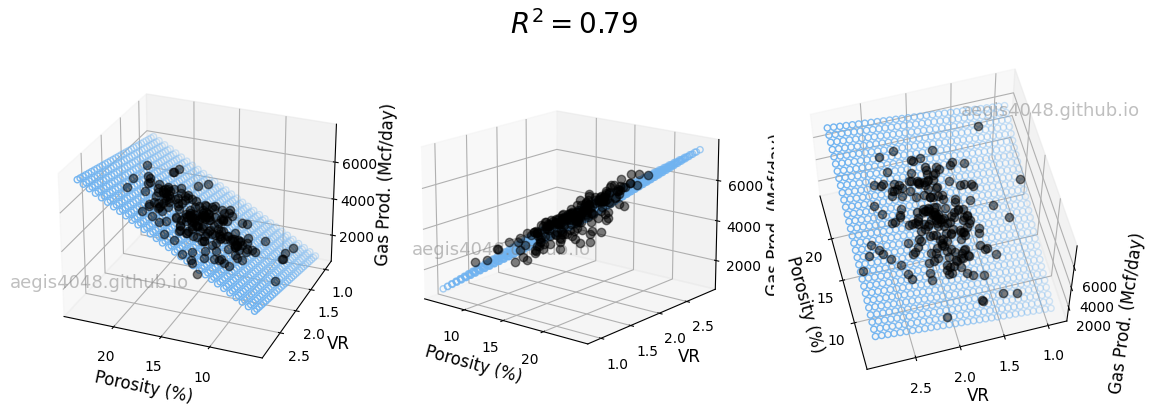

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

X = df[['Por', 'VR']].values.reshape(-1,2)
Y = df['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('VR', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
# fit poly ilne to log normalized chart

In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\cjong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Rename Variables

In [ ]:
# ACS09_5yr_B01001001 - total_population
df_2009['total_population'] = df_2009['ACS09_5yr_B01001001']

# Workers 16 Years and Over in Households,ACS09_5yr_B08014001
df_2009['total_workers'] = df_2009['ACS09_5yr_B08014001']

df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm

# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001
df_2009['aggregate_num_vehicles'] = df_2009['ACS09_5yr_B08015001']

# aggregate_time_per_worker
# Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes).4,ACS09_5yr_C08136001
df_2009['aggregate_time_commute'] = df_2009['ACS09_5yr_C08136001']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
df_2009['aggregate_time_commute_drive_alone'] = df_2009['ACS09_5yr_C08136002']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
df_2009['aggregate_time_commute_carpool'] = df_2009['ACS09_5yr_C08136003']

# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
df_2009['aggregate_time_commute_public_transit'] = df_2009['ACS09_5yr_C08136004']

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005
df_2009['aggregate_time_commute_other_means'] = df_2009['ACS09_5yr_C08136005']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",ACS09_5yr_C08134011
df_2009['total_workers_drove_alone'] = df_2009['ACS09_5yr_C08134011']

# "Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",ACS09_5yr_C08134021
df_2009['total_workers_carpooled'] = df_2009['ACS09_5yr_C08134021']

# Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,ACS09_5yr_C08134031
df_2009['total_workers_public_transit'] = df_2009['ACS09_5yr_C08134031']

# "Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",ACS09_5yr_C08134041
df_2009['total_workers_other_means'] = df_2009['ACS09_5yr_C08134041']

df_2009 = df_2009.dropna(subset=['aggregate_time_commute', 'aggregate_time_commute_drive_alone', 'aggregate_time_commute_carpool', 'aggregate_time_commute_public_transit', 'aggregate_time_commute_other_means'])


# Calculate Variables

In [ ]:
df_2009['population_density'] = df_2009['total_population'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['worker_density'] = df_2009['total_workers'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['vehicles_density'] = df_2009['aggregate_num_vehicles'] / df_2009['Geo_AREALAND']# / 1000000 # convert to sqkm
df_2009['vehicles_per_worker'] = df_2009['aggregate_num_vehicles'] / df_2009['total_workers']# / 1000000 # convert to sqkm
df_2009['vehicles_per_worker_x_landarea'] = (df_2009['aggregate_num_vehicles'] / df_2009['total_workers']) * df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2009['vehicles_per_worker_per_landarea'] = (df_2009['aggregate_num_vehicles'] / df_2009['total_workers']) / df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm
df_2009['vehicles_x_worker_per_landarea'] = (df_2009['aggregate_num_vehicles'] * df_2009['total_workers']) / df_2009['Geo_AREALAND'] # / 1000000 # convert to sqkm

df_2009['average_commute_time_per_worker_drive_alone'] = df_2009['aggregate_time_commute_drive_alone'] / df_2009['total_workers_drove_alone']
average_commute_time_per_worker_drive_alone = sum(df_2009['aggregate_time_commute_drive_alone']) / sum(df_2009['total_workers_drove_alone'])

df_2009['average_commute_time_per_worker_carpool'] = df_2009['aggregate_time_commute_carpool'] / df_2009['total_workers_carpooled']
average_commute_time_per_worker_carpool = sum(df_2009['aggregate_time_commute_carpool']) / sum(df_2009['total_workers_carpooled'])

df_2009['average_commute_time_per_worker_public_transit'] = df_2009['aggregate_time_commute_public_transit'] / df_2009['total_workers_public_transit']
average_commute_time_per_worker_public_transit = sum(df_2009['aggregate_time_commute_public_transit']) / sum(df_2009['total_workers_public_transit'])

df_2009['average_commute_time_per_worker_other_means'] = df_2009['aggregate_time_commute_other_means'] / df_2009['total_workers_other_means']
average_commute_time_per_worker_other_means = sum(df_2009['aggregate_time_commute_other_means']) / sum(df_2009['total_workers_other_means'])


# df_2009['average_commute_time_per_worker_drive_alone'] = df_2009['ACS09_5yr_C08136002'] / df_2009['total_workers_drove_alone']
# average_commute_time_per_worker_drive_alone = sum(df_2009['ACS09_5yr_C08136002']) / sum(df_2009['total_workers_drove_alone'])

# df_2009['average_commute_time_per_worker_carpool'] = df_2009['ACS09_5yr_C08136003'] / df_2009['total_workers_carpooled']
# average_commute_time_per_worker_carpool = sum(df_2009['ACS09_5yr_C08136003']) / sum(df_2009['total_workers_carpooled'])

# df_2009['average_commute_time_per_worker_public_transit'] = df_2009['ACS09_5yr_C08136004'] / df_2009['total_workers_public_transit']
# average_commute_time_per_worker_public_transit = sum(df_2009['ACS09_5yr_C08136004']) / sum(df_2009['total_workers_public_transit'])

# df_2009['average_commute_time_per_worker_other_means'] = df_2009['ACS09_5yr_C08136005'] / df_2009['total_workers_other_means']
# average_commute_time_per_worker_other_means = sum(df_2009['ACS09_5yr_C08136005']) / sum(df_2009['total_workers_other_means'])




In [ ]:
df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]


In [ ]:
df_2009[['Geo_AREALAND','Geo_FIPS','population_density','worker_density','vehicles_density','vehicles_per_worker','vehicles_per_worker_x_landarea',
        'average_commute_time_per_worker_drive_alone','average_commute_time_per_worker_carpool','average_commute_time_per_worker_public_transit','average_commute_time_per_worker_other_means']]
# df_2009.query("Geo_FIPS == 36061")[['Geo_AREALAND','Geo_FIPS']]

df_2009.to_excel('df_2009.xlsx', index=False)
# average commute time based on population density

In [ ]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

In [ ]:
year = [2008,2018]

qaverage_commute_time_per_worker_drive_alone = [average_commute_time_per_worker_drive_alone,average_commute_time_per_worker_drive_alone]
qaverage_commute_time_per_worker_carpool = [average_commute_time_per_worker_carpool,average_commute_time_per_worker_carpool]
qaverage_commute_time_per_worker_public_transit = [average_commute_time_per_worker_public_transit,average_commute_time_per_worker_public_transit]
qaverage_commute_time_per_worker_other_means = [average_commute_time_per_worker_other_means,average_commute_time_per_worker_other_means]
percentages = [qaverage_commute_time_per_worker_drive_alone, qaverage_commute_time_per_worker_carpool, qaverage_commute_time_per_worker_public_transit, qaverage_commute_time_per_worker_other_means]

COLORS = [BLUE, GREEN, RED, BROWN]

In [ ]:
# Initialize plot ------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Add lines with dots
# Note the zorder to have dots be on top of the lines
for percentage, color in zip(percentages, COLORS):
    ax.plot(year, percentage, color=color, lw=5)
    ax.scatter(year, percentage, fc=color, s=100, lw=1.5, ec="white", zorder=12)

In [ ]:
# aggregate times per mode of transportation

##### PERCENTS GO INTO THE Y AXIS
# % Workers 16 Years and Over in Households: No Vehicle Available,PCT_ACS09_5yr_B08014002
# % Workers 16 Years and Over in Households: 1 Vehicle Available,PCT_ACS09_5yr_B08014003
# % Workers 16 Years and Over in Households: 2 Vehicles Available,PCT_ACS09_5yr_B08014004
# % Workers 16 Years and Over in Households: 3 Vehicles Available,PCT_ACS09_5yr_B08014005
# % Workers 16 Years and Over in Households: 4 Vehicles Available,PCT_ACS09_5yr_B08014006
# % Workers 16 Years and Over in Households: 5 or More Vehicles Available,PCT_ACS09_5yr_B08014007

# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Drove Alone",PCT_ACS09_5yr_C08136002
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Car, Truck, or Van - Carpooled",PCT_ACS09_5yr_C08136003
# % Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Public Transportation (Excluding Taxicab),PCT_ACS09_5yr_C08136004
# "% Workers 16 Years and Over Who Did Not Work At Home: Aggregate Travel Time to Work (in Minutes): Taxicab, Motorcycle, Bicycle, Walked, or Other Means",PCT_ACS09_5yr_C08136005

##### 
# "Workers Whose Means of Transportation Is Car, Truck, or Van: Aggregate Number of Vehicles (Car, Truck, or Van) Used in Commuting",ACS09_5yr_B08015001


# % Workers 16 Years and Over Who Did Not Work At Home: Less than 10 Minutes,PCT_ACS09_5yr_C08134002
# % Workers 16 Years and Over Who Did Not Work At Home: 10 to 14 Minutes.1,PCT_ACS09_5yr_C08134003
# % Workers 16 Years and Over Who Did Not Work At Home: 15 to 19 Minutes.1,PCT_ACS09_5yr_C08134004
# % Workers 16 Years and Over Who Did Not Work At Home: 20 to 24 Minutes.1,PCT_ACS09_5yr_C08134005
# % Workers 16 Years and Over Who Did Not Work At Home: 25 to 29 Minutes.1,PCT_ACS09_5yr_C08134006
# % Workers 16 Years and Over Who Did Not Work At Home: 30 to 34 Minutes.1,PCT_ACS09_5yr_C08134007
# % Workers 16 Years and Over Who Did Not Work At Home: 35 to 44 Minutes,PCT_ACS09_5yr_C08134008
# % Workers 16 Years and Over Who Did Not Work At Home: 45 to 59 Minutes.1,PCT_ACS09_5yr_C08134009
# % Workers 16 Years and Over Who Did Not Work At Home: 60 or More Minutes,PCT_ACS09_5yr_C08134010
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone.1",PCT_ACS09_5yr_C08134011
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: Less than 10 Minutes",PCT_ACS09_5yr_C08134012
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 10 to 14 Minutes",PCT_ACS09_5yr_C08134013
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 15 to 19 Minutes",PCT_ACS09_5yr_C08134014
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 20 to 24 Minutes",PCT_ACS09_5yr_C08134015
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 25 to 29 Minutes",PCT_ACS09_5yr_C08134016
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 30 to 34 Minutes",PCT_ACS09_5yr_C08134017
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 35 to 44 Minutes",PCT_ACS09_5yr_C08134018
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 45 to 59 Minutes",PCT_ACS09_5yr_C08134019
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Drove Alone: 60 or More Minutes",PCT_ACS09_5yr_C08134020
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled.1",PCT_ACS09_5yr_C08134021
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: Less than 10 Minutes",PCT_ACS09_5yr_C08134022
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 10 to 14 Minutes",PCT_ACS09_5yr_C08134023
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 15 to 19 Minutes",PCT_ACS09_5yr_C08134024
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 20 to 24 Minutes",PCT_ACS09_5yr_C08134025
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 25 to 29 Minutes",PCT_ACS09_5yr_C08134026
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 30 to 34 Minutes",PCT_ACS09_5yr_C08134027
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 35 to 44 Minutes",PCT_ACS09_5yr_C08134028
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 45 to 59 Minutes",PCT_ACS09_5yr_C08134029
# "% Workers 16 Years and Over Who Did Not Work At Home: Car, Truck, or Van - Carpooled: 60 or More Minutes",PCT_ACS09_5yr_C08134030
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab).1,PCT_ACS09_5yr_C08134031
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): Less than 10 Minutes,PCT_ACS09_5yr_C08134032
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 10 to 14 Minutes,PCT_ACS09_5yr_C08134033
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 15 to 19 Minutes,PCT_ACS09_5yr_C08134034
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 20 to 24 Minutes,PCT_ACS09_5yr_C08134035
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 25 to 29 Minutes,PCT_ACS09_5yr_C08134036
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 30 to 34 Minutes,PCT_ACS09_5yr_C08134037
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 35 to 44 Minutes,PCT_ACS09_5yr_C08134038
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 45 to 59 Minutes,PCT_ACS09_5yr_C08134039
# % Workers 16 Years and Over Who Did Not Work At Home: Public Transportation (Excluding Taxicab): 60 or More Minutes,PCT_ACS09_5yr_C08134040
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means",PCT_ACS09_5yr_C08134041
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: Less than 10 Minutes",PCT_ACS09_5yr_C08134042
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 10 to 14 Minutes",PCT_ACS09_5yr_C08134043
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 15 to 19 Minutes",PCT_ACS09_5yr_C08134044
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 20 to 24 Minutes",PCT_ACS09_5yr_C08134045
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 25 to 29 Minutes",PCT_ACS09_5yr_C08134046
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 30 to 34 Minutes",PCT_ACS09_5yr_C08134047
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 35 to 44 Minutes",PCT_ACS09_5yr_C08134048
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 45 to 59 Minutes",PCT_ACS09_5yr_C08134049
# "% Workers 16 Years and Over Who Did Not Work At Home: Taxicab, Motorcycle, Bicycle,  Walked, or Other Means: 60 or More Minutes",PCT_ACS09_5yr_C08134050

In [ ]:
df_2009['PCT_ACS09_5yr_B08131002']